In [45]:
# LabelEncoder를 import하여 범주형 데이터를 숫자형으로 변환할 수 있도록 설정
from sklearn.preprocessing import LabelEncoder
import pre_data as eda
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import statsmodels.api as sm

data = pd.read_csv(
        './data/train.csv',
        encoding='cp949',
)

import pre_data as eda
# 상위 디렉토리를 경로에 추가 (test.ipynb 파일 기준으로)
preprocessed_data = eda.preprocessing(data)


object_columns = preprocessed_data.select_dtypes(include=['object'])
convert_data, _ = eda.convert_category_into_integer(preprocessed_data, object_columns)
data_preprocessed = convert_data
# 타겟 변수 및 독립 변수 설정
X = convert_data.drop('Churn', axis=1).astype(float)
y = convert_data['Churn'].astype(int)  # 이진 분류

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 데이터 스케일링 (StandardScaler 사용)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 로지스틱 회귀 모델 학습
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train_scaled, y_train)

# 예측 및 평가
y_pred = log_reg_model.predict(X_test_scaled)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# 결과 출력
accuracy, classification_rep


nan-value filled
MonthlyRevenue : 50887, 삭제된 수 : 1
MonthlyMinutes : 50883, 삭제된 수 : 4
TotalRecurringCharge : 50874, 삭제된 수 : 9
DirectorAssistedCalls : 50874, 삭제된 수 : 0
OverageMinutes : 50870, 삭제된 수 : 4
RoamingCalls : 50862, 삭제된 수 : 8
PercChangeMinutes : 50860, 삭제된 수 : 2
DroppedCalls : 50856, 삭제된 수 : 4
BlockedCalls : 50852, 삭제된 수 : 4
UnansweredCalls : 50842, 삭제된 수 : 10
CustomerCareCalls : 50840, 삭제된 수 : 2
ThreewayCalls : 50836, 삭제된 수 : 4
ReceivedCalls : 50830, 삭제된 수 : 6
OutboundCalls : 50827, 삭제된 수 : 3
InboundCalls : 50823, 삭제된 수 : 4
PeakCallsInOut : 50821, 삭제된 수 : 2
OffPeakCallsInOut : 50806, 삭제된 수 : 15
DroppedBlockedCalls : 50792, 삭제된 수 : 14
CallForwardingCalls : 50779, 삭제된 수 : 13
CallWaitingCalls : 50779, 삭제된 수 : 0
MonthsInService : 50778, 삭제된 수 : 1
UniqueSubs : 50777, 삭제된 수 : 1
ActiveSubs : 50777, 삭제된 수 : 0
Handsets : 50773, 삭제된 수 : 4
HandsetModels : 50773, 삭제된 수 : 0
CurrentEquipmentDays : 50768, 삭제된 수 : 5
RetentionCalls : 50634, 삭제된 수 : 134
RetentionOffersAccepted : 50634, 삭제된 수 : 0


(0.7101234567901235,
 '              precision    recall  f1-score   support\n\n           0       0.72      0.98      0.83      7219\n           1       0.44      0.04      0.07      2906\n\n    accuracy                           0.71     10125\n   macro avg       0.58      0.51      0.45     10125\nweighted avg       0.64      0.71      0.61     10125\n')

In [4]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 1. SMOTE와 언더샘플링을 함께 적용
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# 2. 언더샘플링을 추가로 적용
undersample = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersample.fit_resample(X_train_smote, y_train_smote)

# 3. 클래스 가중치를 설정한 로지스틱 회귀 모델
log_reg_model_combined = LogisticRegression(class_weight='balanced')

# 4. SMOTE와 언더샘플링을 거친 데이터로 모델 학습
log_reg_model_combined.fit(X_train_resampled, y_train_resampled)

# 5. 예측 및 평가
y_pred_combined = log_reg_model_combined.predict(X_test_scaled)

# 6. 모델 평가
accuracy_combined = accuracy_score(y_test, y_pred_combined)
classification_rep_combined = classification_report(y_test, y_pred_combined)

# 결과 출력
print(f"Accuracy: {accuracy_combined}")
print(classification_rep_combined)


Accuracy: 0.5703703703703704
              precision    recall  f1-score   support

           0       0.77      0.57      0.65      7219
           1       0.35      0.58      0.44      2906

    accuracy                           0.57     10125
   macro avg       0.56      0.57      0.55     10125
weighted avg       0.65      0.57      0.59     10125



In [5]:
from sklearn.ensemble import RandomForestClassifier

# 랜덤 포레스트 모델 생성 및 학습
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train_scaled, y_train)

# 예측 및 평가
y_pred_rf = rf_model.predict(X_test_scaled)

# 모델 평가
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

# 결과 출력
accuracy_rf, classification_rep_rf


(0.7172345679012345,
 '              precision    recall  f1-score   support\n\n           0       0.72      0.98      0.83      7219\n           1       0.58      0.06      0.10      2906\n\n    accuracy                           0.72     10125\n   macro avg       0.65      0.52      0.47     10125\nweighted avg       0.68      0.72      0.62     10125\n')

In [19]:
# 랜덤 포레스트 모델로 각 샘플에 대한 이탈하지 않을 확률을 예측
y_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 0]  # 클래스 0에 대한 확률값

# 이탈하지 않을 확률이 낮은 고객을 이탈 고객으로 판단 (예: 0.5 미만일 때)
threshold = 0.1  # 임계값 설정
y_pred_inverted = (y_proba_rf < threshold).astype(int)  # 이탈 고객으로 분류

# 모델 평가
accuracy_inverted = accuracy_score(y_test, y_pred_inverted)
classification_rep_inverted = classification_report(y_test, y_pred_inverted)

# 결과 출력
print(f"Accuracy with Inverted Strategy: {accuracy_inverted}")
print(classification_rep_inverted)


Accuracy with Inverted Strategy: 0.7131851851851851
              precision    recall  f1-score   support

           0       0.71      1.00      0.83      7219
           1       0.75      0.00      0.00      2906

    accuracy                           0.71     10125
   macro avg       0.73      0.50      0.42     10125
weighted avg       0.72      0.71      0.59     10125



In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# 로지스틱 회귀 하이퍼파라미터 튜닝 설정
param_grid = {
    'C': [0.1, 1, 10, 100],  # 규제 강도
    'penalty': ['l1', 'l2'],  # 규제 종류
    'solver': ['liblinear', 'saga']  # 최적화 알고리즘
}

# GridSearchCV 사용하여 최적의 파라미터 탐색
log_reg_model = LogisticRegression(class_weight='balanced', random_state=42, max_iter=10000)
grid_search = GridSearchCV(estimator=log_reg_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# 학습 진행
grid_search.fit(X_train_scaled, y_train)

# 최적의 파라미터 출력
best_params = grid_search.best_params_

# 최적 모델로 테스트 데이터 예측
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)

# 모델 평가
accuracy_best = accuracy_score(y_test, y_pred_best)
classification_rep_best = classification_report(y_test, y_pred_best)

# 결과 출력
best_params, accuracy_best, classification_rep_best

Fitting 3 folds for each of 16 candidates, totalling 48 fits


({'C': 0.1, 'penalty': 'l1', 'solver': 'saga'},
 0.5900246913580247,
 '              precision    recall  f1-score   support\n\n           0       0.77      0.60      0.68      7219\n           1       0.36      0.57      0.44      2906\n\n    accuracy                           0.59     10125\n   macro avg       0.57      0.58      0.56     10125\nweighted avg       0.66      0.59      0.61     10125\n')

In [23]:
# 1. 상관관계 기반 파생 변수를 추가한 후, X와 y 설정
X = data_preprocessed.drop('Churn', axis=1)
y = data_preprocessed['Churn'].astype(int)

# 2. 데이터 스케일링
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. 로지스틱 회귀 모델 학습
log_reg_model = LogisticRegression(class_weight='balanced', C=0.1, penalty='l1', solver='saga', max_iter=10000)
log_reg_model.fit(X_train_scaled, y_train)

# 4. 예측 및 평가
y_pred = log_reg_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# 결과 출력
print(f"Accuracy: {accuracy}")
print(classification_rep)


Accuracy: 0.5839012345679012
              precision    recall  f1-score   support

           0       0.77      0.60      0.67      7220
           1       0.35      0.55      0.43      2905

    accuracy                           0.58     10125
   macro avg       0.56      0.57      0.55     10125
weighted avg       0.65      0.58      0.60     10125



In [24]:
# 1. 파생 변수 추가
data_preprocessed['RevenuePerMinute'] = data_preprocessed['MonthlyRevenue'] / data_preprocessed['MonthlyMinutes'].replace(0, 1)
data_preprocessed['ChurnRiskScore'] = (data_preprocessed['DroppedCalls'] + data_preprocessed['CustomerCareCalls']) / data_preprocessed['MonthsInService'].replace(0, 1)
data_preprocessed['ActivityLevel'] = (data_preprocessed['ReceivedCalls'] + data_preprocessed['OutboundCalls'] + data_preprocessed['InboundCalls'])
data_preprocessed['ActivityPerEquipment'] = data_preprocessed['ActivityLevel'] / data_preprocessed['CurrentEquipmentDays'].replace(0, 1)
data_preprocessed['RetentionAttempts'] = data_preprocessed['RetentionCalls'] * data_preprocessed['RetentionOffersAccepted']

# 2. 데이터 분할 (X와 y 설정)
X = data_preprocessed.drop('Churn', axis=1)
y = data_preprocessed['Churn'].astype(int)

# 3. 데이터 스케일링
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. 로지스틱 회귀 모델 학습
log_reg_model = LogisticRegression(class_weight='balanced', C=0.1, penalty='l1', solver='saga', max_iter=10000)
log_reg_model.fit(X_train_scaled, y_train)

# 5. 예측 및 평가
y_pred = log_reg_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# 결과 출력
print(f"Accuracy: {accuracy}")
print(classification_rep)


Accuracy: 0.5929876543209877
              precision    recall  f1-score   support

           0       0.78      0.60      0.68      7220
           1       0.36      0.56      0.44      2905

    accuracy                           0.59     10125
   macro avg       0.57      0.58      0.56     10125
weighted avg       0.66      0.59      0.61     10125



In [25]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 여러 모델을 설정
models = {
    "LogisticRegression": LogisticRegression(class_weight='balanced', C=0.1, penalty='l1', solver='saga', max_iter=10000),
    "RandomForestClassifier": RandomForestClassifier(class_weight='balanced', random_state=42),
    "XGBClassifier": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "GradientBoostingClassifier": GradientBoostingClassifier(random_state=42),
    "LGBMClassifier": LGBMClassifier(random_state=42)
}

# 모델 성능을 저장할 딕셔너리
results = {}

# 각 모델에 대해 학습 및 평가
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    
    # 성능 저장
    results[name] = {
        "accuracy": accuracy,
        "classification_report": classification_rep
    }

# 결과 출력
for name, metrics in results.items():
    print(f"Model: {name}")
    print(f"Accuracy: {metrics['accuracy']}")
    print(f"Classification Report:\n{metrics['classification_report']}")
    print("\n" + "="*60 + "\n")


Training LogisticRegression...
Training RandomForestClassifier...
Training XGBClassifier...


c:\Utils\anaconda3\envs\deep_learning\lib\site-packages\xgboost\core.py:158: UserWarning: [17:18:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training GradientBoostingClassifier...
Training LGBMClassifier...
[LightGBM] [Info] Number of positive: 11644, number of negative: 28852
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002015 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6261
[LightGBM] [Info] Number of data points in the train set: 40496, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.287535 -> initscore=-0.907388
[LightGBM] [Info] Start training from score -0.907388
Model: LogisticRegression
Accuracy: 0.5929876543209877
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.60      0.68      7220
           1       0.36      0.56      0.44      2905

    accuracy                           0.59     10125
   macro avg       0.57      0.58      0.56     10125
weighted avg       0.66   

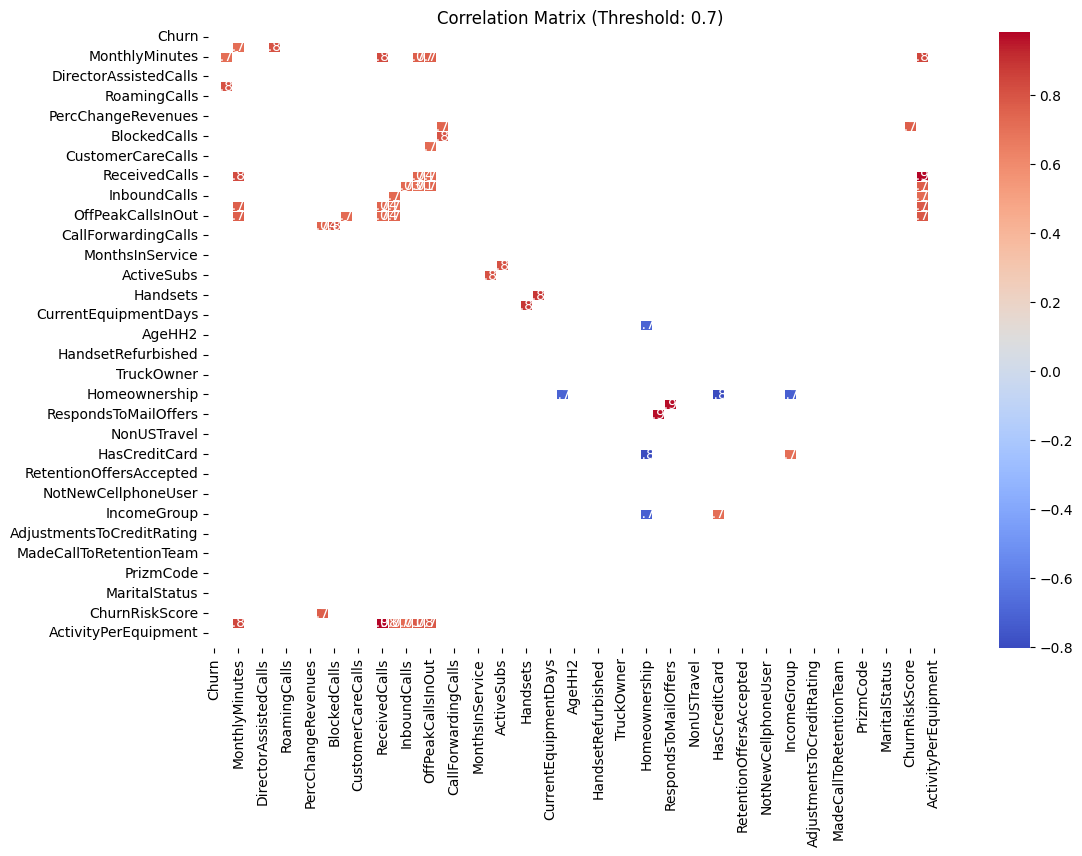

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 상관관계 행렬 계산
correlation_matrix = data_preprocessed.corr()

# 절대값이 일정 임계값 이상인 상관관계만 필터링
threshold = 0.7  # 임계값 설정 (예: 0.7 이상만 필터링)
high_corr = correlation_matrix[(np.abs(correlation_matrix) >= threshold) & (correlation_matrix != 1.0)]

# 상관관계 히트맵 시각화 (임계값 이상인 변수들만)
plt.figure(figsize=(12, 8))
sns.heatmap(high_corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title(f'Correlation Matrix (Threshold: {threshold})')
plt.show()



In [28]:
# 1. 변수 결합
data_preprocessed['ActivityLevel'] = (data_preprocessed['ReceivedCalls'] + 
                                      data_preprocessed['InboundCalls'] + 
                                      data_preprocessed['OffPeakCallsInOut'])

data_preprocessed['EquipmentUsage'] = data_preprocessed['Handsets'] / data_preprocessed['CurrentEquipmentDays'].replace(0, 1)

# 2. 불필요한 변수 삭제
data_preprocessed = data_preprocessed.drop(['ReceivedCalls', 'InboundCalls', 'OffPeakCallsInOut', 
                                            'Handsets', 'CurrentEquipmentDays'], axis=1)

# 3. 데이터 분할 (X와 y 설정)
X = data_preprocessed.drop('Churn', axis=1)
y = data_preprocessed['Churn'].astype(int)

# 4. 데이터 스케일링
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. 로지스틱 회귀 모델 학습
log_reg_model = LogisticRegression(class_weight='balanced', C=0.1, penalty='l1', solver='saga', max_iter=10000)
log_reg_model.fit(X_train_scaled, y_train)

# 6. 예측 및 평가
y_pred = log_reg_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# 결과 출력
print(f"Accuracy: {accuracy}")
print(classification_rep)


Accuracy: 0.5923950617283951
              precision    recall  f1-score   support

           0       0.77      0.61      0.68      7220
           1       0.36      0.55      0.44      2905

    accuracy                           0.59     10125
   macro avg       0.57      0.58      0.56     10125
weighted avg       0.65      0.59      0.61     10125



In [30]:
# 1. 변수 결합
data_preprocessed['ActivityLevel'] = (data_preprocessed['ReceivedCalls'] + 
                                      data_preprocessed['InboundCalls'] + 
                                      data_preprocessed['OffPeakCallsInOut'])

data_preprocessed['EquipmentUsage'] = data_preprocessed['Handsets'] / data_preprocessed['CurrentEquipmentDays'].replace(0, 1)

data_preprocessed['RevenueStability'] = data_preprocessed['MonthlyRevenue'] * (1 + data_preprocessed['PercChangeRevenues'] / 100)

data_preprocessed['CallFailureRate'] = (data_preprocessed['DroppedCalls'] + data_preprocessed['BlockedCalls']) / (data_preprocessed['MonthlyMinutes'].replace(0, 1))

data_preprocessed['ServiceQueryLevel'] = data_preprocessed['RoamingCalls'] + data_preprocessed['CustomerCareCalls']

data_preprocessed['RetentionEffortPerServiceMonth'] = data_preprocessed['RetentionCalls'] / data_preprocessed['MonthsInService'].replace(0, 1)

# 2. 불필요한 변수 삭제
data_preprocessed = data_preprocessed.drop(['ReceivedCalls', 'InboundCalls', 'OffPeakCallsInOut', 
                                            'Handsets', 'CurrentEquipmentDays', 'MonthlyRevenue', 'PercChangeRevenues',
                                            'DroppedCalls', 'BlockedCalls', 'RoamingCalls', 'CustomerCareCalls', 'MonthsInService'], axis=1)

# 3. 데이터 분할 (X와 y 설정)
X = data_preprocessed.drop('Churn', axis=1)
y = data_preprocessed['Churn'].astype(int)

# 4. 데이터 스케일링
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. 로지스틱 회귀 모델 학습
log_reg_model = LogisticRegression(class_weight='balanced', C=0.1, penalty='l1', solver='saga', max_iter=10000)
log_reg_model.fit(X_train_scaled, y_train)

# 6. 예측 및 평가
y_pred = log_reg_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# 결과 출력
print(f"Accuracy: {accuracy}")
print(classification_rep)


KeyError: 'ReceivedCalls'

In [32]:
# 1. 변수 결합
data_preprocessed['ActivityLevel'] = (data_preprocessed['OutboundCalls'] + 
                                      data_preprocessed['PeakCallsInOut'] + 
                                      data_preprocessed['UnansweredCalls'])

data_preprocessed['CallFailureRate'] = (data_preprocessed['DroppedCalls'] + data_preprocessed['BlockedCalls']) / data_preprocessed['MonthlyMinutes'].replace(0, 1)

data_preprocessed['ServiceQueryLevel'] = data_preprocessed['RoamingCalls'] + data_preprocessed['CustomerCareCalls']

data_preprocessed['RetentionEffortPerServiceMonth'] = data_preprocessed['RetentionCalls'] / data_preprocessed['MonthsInService'].replace(0, 1)

# 2. 불필요한 변수 삭제
data_preprocessed = data_preprocessed.drop(['OutboundCalls', 'PeakCallsInOut', 'UnansweredCalls', 
                                            'DroppedCalls', 'BlockedCalls', 'RoamingCalls', 
                                            'CustomerCareCalls', 'RetentionCalls', 'MonthsInService'], axis=1)

# 3. 데이터 분할 (X와 y 설정)
X = data_preprocessed.drop('Churn', axis=1)
y = data_preprocessed['Churn'].astype(int)

# 4. 데이터 스케일링
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. 로지스틱 회귀 모델 학습
log_reg_model = LogisticRegression(class_weight='balanced', C=0.1, penalty='l1', solver='saga', max_iter=10000)
log_reg_model.fit(X_train_scaled, y_train)

# 6. 예측 및 평가
y_pred = log_reg_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# 결과 출력
print(f"Accuracy: {accuracy}")
print(classification_rep)


Accuracy: 0.5891358024691358
              precision    recall  f1-score   support

           0       0.77      0.61      0.68      7220
           1       0.36      0.54      0.43      2905

    accuracy                           0.59     10125
   macro avg       0.56      0.58      0.55     10125
weighted avg       0.65      0.59      0.61     10125



In [35]:
# 1. 변수 결합
data_preprocessed['ActivityLevel'] = (data_preprocessed['OutboundCalls'] + 
                                      data_preprocessed['PeakCallsInOut'] + 
                                      data_preprocessed['UnansweredCalls'])

data_preprocessed['CallFailureRate'] = (data_preprocessed['DroppedCalls'] + data_preprocessed['BlockedCalls']) / data_preprocessed['MonthlyMinutes'].replace(0, 1)

data_preprocessed['ServiceQueryLevel'] = data_preprocessed['RoamingCalls'] + data_preprocessed['CustomerCareCalls']

data_preprocessed['RetentionEffortPerServiceMonth'] = data_preprocessed['RetentionCalls'] / data_preprocessed['MonthsInService'].replace(0, 1)

# 2. 불필요한 변수 삭제
data_preprocessed = data_preprocessed.drop(['OutboundCalls', 'PeakCallsInOut', 'UnansweredCalls', 
                                            'DroppedCalls', 'BlockedCalls', 'RoamingCalls', 
                                            'CustomerCareCalls', 'RetentionCalls', 'MonthsInService'], axis=1)

# 3. 데이터 분할 (X와 y 설정)
X = data_preprocessed.drop('Churn', axis=1)
y = data_preprocessed['Churn'].astype(int)

# 4. 데이터 스케일링
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. 로지스틱 회귀 모델 학습
log_reg_model = LogisticRegression(class_weight='balanced', C=0.1, penalty='l1', solver='saga', max_iter=10000)
log_reg_model.fit(X_train_scaled, y_train)

# 6. 예측 및 평가
y_pred = log_reg_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# 결과 출력
accuracy, classification_rep


(0.5909135802469135,
 '              precision    recall  f1-score   support\n\n           0       0.77      0.61      0.68      7220\n           1       0.36      0.54      0.43      2905\n\n    accuracy                           0.59     10125\n   macro avg       0.56      0.57      0.56     10125\nweighted avg       0.65      0.59      0.61     10125\n')

In [46]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# 1. 결측값 처리 (평균값 또는 최빈값으로 채움)
data_preprocessed.fillna(data_preprocessed.mean(), inplace=True)

# # 2. 이상치 처리 (IQR 사용)
# Q1 = data_preprocessed.quantile(0.25)
# Q3 = data_preprocessed.quantile(0.75)
# IQR = Q3 - Q1
# data_preprocessed = data_preprocessed[~((data_preprocessed < (Q1 - 1.5 * IQR)) |(data_preprocessed > (Q3 + 1.5 * IQR))).any(axis=1)]

# 3. 불필요한 변수 삭제 (강한 상관관계 기반으로 대표 변수만 유지)
data_preprocessed = data_preprocessed.drop(['DroppedCalls', 'BlockedCalls'], axis=1)

# 4. 파생 변수 추가
data_preprocessed['RevenueStability'] = data_preprocessed['MonthlyRevenue'] * (1 + data_preprocessed['PercChangeRevenues'] / 100)
data_preprocessed['ActivityLevel'] = data_preprocessed['OutboundCalls'] + data_preprocessed['PeakCallsInOut']

# 5. 데이터 스케일링 (표준화)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_preprocessed.drop('Churn', axis=1))

# 6. 클래스 불균형 처리 (SMOTE 사용)
X = data_scaled
y = data_preprocessed['Churn'].astype(int)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 7. 데이터 분할 (학습/테스트 데이터 분리)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# # 8. 모델 학습 (로지스틱 회귀 사용)
# log_reg_model = LogisticRegression(class_weight='balanced', C=0.1, penalty='l1', solver='saga', max_iter=10000)
# log_reg_model.fit(X_train, y_train)

# # 9. 예측 및 평가
# y_pred = log_reg_model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# classification_rep = classification_report(y_test, y_pred)

# # 결과 출력
# print(f"Accuracy: {accuracy}")
# print(classification_rep)


C:\Users\SWY\AppData\Local\Temp\ipykernel_4392\1202193826.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_preprocessed.fillna(data_preprocessed.mean(), inplace=True)


In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# 1. 로지스틱 회귀의 하이퍼파라미터 설정
param_grid = {
    'C': [0.01, 0.1, 1, 10],  # 규제 강도
    'penalty': ['l1', 'l2'],   # L1 또는 L2 규제
    'solver': ['liblinear', 'saga']  # L1과 L2를 모두 지원하는 솔버
}

# 2. 로지스틱 회귀 모델 생성
log_reg = LogisticRegression(max_iter=10000, class_weight='balanced')

# 3. GridSearchCV를 사용하여 하이퍼파라미터 탐색
grid_search = GridSearchCV(log_reg, param_grid, cv=3, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# 4. 최적의 하이퍼파라미터와 성능 출력
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best Accuracy: {grid_search.best_score_}")

# 5. 최적의 하이퍼파라미터로 최종 모델 학습 및 평가
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# 결과 출력
print(f"Final Model Accuracy: {accuracy}")
print(classification_rep)


Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Hyperparameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Best Accuracy: 0.5887551779777126
Final Model Accuracy: 0.5890914131263428
              precision    recall  f1-score   support

           0       0.60      0.57      0.58      7309
           1       0.58      0.61      0.59      7120

    accuracy                           0.59     14429
   macro avg       0.59      0.59      0.59     14429
weighted avg       0.59      0.59      0.59     14429



In [49]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 1. 각 모델에 대한 하이퍼파라미터 설정
param_grids = {
    'LogisticRegression': {
        'C': [0.01, 0.1, 1, 10],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    },
    'RandomForestClassifier': {
        'n_estimators': [100, 200, 500],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'XGBClassifier': {
        'n_estimators': [100, 200, 500],
        'max_depth': [3, 6, 10],
        'learning_rate': [0.01, 0.1, 0.2]
    },
    'GradientBoostingClassifier': {
        'n_estimators': [100, 200, 500],
        'max_depth': [3, 6, 10],
        'learning_rate': [0.01, 0.1, 0.2]
    },
    'LGBMClassifier': {
        'n_estimators': [100, 200, 500],
        'max_depth': [3, 6, 10],
        'learning_rate': [0.01, 0.1, 0.2]
    }
}

# 2. 모델 정의
models = {
    'LogisticRegression': LogisticRegression(max_iter=10000, class_weight='balanced'),
    'RandomForestClassifier': RandomForestClassifier(class_weight='balanced', random_state=42),
    'XGBClassifier': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'GradientBoostingClassifier': GradientBoostingClassifier(random_state=42),
    'LGBMClassifier': LGBMClassifier(random_state=42)
}

# 3. 하이퍼파라미터 튜닝 및 모델 성능 비교
best_models = {}
for model_name, model in models.items():
    print(f"Training and tuning {model_name}...")
    grid_search = GridSearchCV(model, param_grids[model_name], cv=3, scoring='accuracy', verbose=1)
    grid_search.fit(X_train, y_train)

    # 최적의 하이퍼파라미터와 성능 저장
    best_models[model_name] = {
        'best_estimator': grid_search.best_estimator_,
        'best_params': grid_search.best_params_,
        'best_score': grid_search.best_score_
    }

    # 테스트 데이터에 대해 성능 평가
    y_pred = grid_search.best_estimator_.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    print(f"\nBest Hyperparameters for {model_name}: {grid_search.best_params_}")
    print(f"Best Cross-Validation Accuracy: {grid_search.best_score_}")
    print(f"Test Accuracy: {accuracy}")
    print(f"Classification Report:\n{classification_rep}\n")
    print("="*60)


Training and tuning LogisticRegression...
Fitting 3 folds for each of 16 candidates, totalling 48 fits

Best Hyperparameters for LogisticRegression: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.588737851159263
Test Accuracy: 0.5891607179984752
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.57      0.58      7309
           1       0.58      0.61      0.60      7120

    accuracy                           0.59     14429
   macro avg       0.59      0.59      0.59     14429
weighted avg       0.59      0.59      0.59     14429


Training and tuning RandomForestClassifier...
Fitting 3 folds for each of 27 candidates, totalling 81 fits


KeyboardInterrupt: 

In [56]:
# 로지스틱 회귀 모델의 계수 및 상수 출력
print("모델의 계수 (Coefficients):")
print(best_model.coef_)

print("\n모델의 상수 (Intercept):")
print(best_model.intercept_)

# 원본 데이터프레임에서 열 이름 가져오기 (data_preprocessed 사용)
feature_importance = pd.DataFrame({
    'Feature': data_preprocessed.drop('Churn', axis=1).columns,  # 원본 데이터프레임에서 열 이름 가져옴
    'Coefficient': best_model.coef_[0]
})

print("\n특성 중요도 (Feature Importance):")
print(feature_importance.sort_values(by='Coefficient', ascending=False))


모델의 계수 (Coefficients):
[[ 0.         -0.12181991 -0.04534266 -0.03111784  0.11369608  0.03225701
  -0.14405383  0.11119223  0.         -0.04316448 -0.03409085  0.
   0.         -0.01013488  0.          0.          0.04061093  0.
   0.         -0.17129087  0.08088824 -0.06179426  0.          0.0421263
   0.00074577  0.33090887 -0.15281342 -0.01049626  0.04289997  0.08539745
  -0.02347235 -0.0204218   0.          0.          0.         -0.06599478
  -0.00034305 -0.00334745  0.          0.05808439  0.01688911 -0.01732446
  -0.03745157 -0.00712945 -0.00220912 -0.00724018  0.01195254 -0.03344412
  -0.03586258  0.10997939 -0.09761508 -0.00200408  0.          0.04905907
   0.          0.        ]]

모델의 상수 (Intercept):
[-0.03444833]

특성 중요도 (Feature Importance):
                      Feature  Coefficient
25       CurrentEquipmentDays     0.330909
4              OverageMinutes     0.113696
7          PercChangeRevenues     0.111192
49    MadeCallToRetentionTeam     0.109979
29         HandsetRe

In [57]:
# 로지스틱 회귀 모델의 계수 및 상수 출력
print("모델의 계수 (Coefficients):")
print(best_model.coef_)

print("\n모델의 상수 (Intercept):")
print(best_model.intercept_)

# 원본 데이터프레임에서 열 이름 가져오기 (data_preprocessed 사용)
feature_importance = pd.DataFrame({
    'Feature': data_preprocessed.drop('Churn', axis=1).columns,  # 원본 데이터프레임에서 열 이름 가져옴
    'Coefficient': best_model.coef_[0]
})

# Coefficient가 0이 아닌 것만 필터링
filtered_feature_importance = feature_importance[feature_importance['Coefficient'] != 0]

print("\n0이 아닌 특성 중요도 (Feature Importance):")
filtered_feature_importance.sort_values(by='Coefficient', ascending=False)

모델의 계수 (Coefficients):
[[ 0.         -0.12181991 -0.04534266 -0.03111784  0.11369608  0.03225701
  -0.14405383  0.11119223  0.         -0.04316448 -0.03409085  0.
   0.         -0.01013488  0.          0.          0.04061093  0.
   0.         -0.17129087  0.08088824 -0.06179426  0.          0.0421263
   0.00074577  0.33090887 -0.15281342 -0.01049626  0.04289997  0.08539745
  -0.02347235 -0.0204218   0.          0.          0.         -0.06599478
  -0.00034305 -0.00334745  0.          0.05808439  0.01688911 -0.01732446
  -0.03745157 -0.00712945 -0.00220912 -0.00724018  0.01195254 -0.03344412
  -0.03586258  0.10997939 -0.09761508 -0.00200408  0.          0.04905907
   0.          0.        ]]

모델의 상수 (Intercept):
[-0.03444833]

0이 아닌 특성 중요도 (Feature Importance):


,Feature,Coefficient
25,CurrentEquipmentDays,0.330909
4,OverageMinutes,0.113696
7,PercChangeRevenues,0.111192
49,MadeCallToRetentionTeam,0.109979
29,HandsetRefurbished,0.085397
20,UniqueSubs,0.080888
39,HasCreditCard,0.058084
53,MaritalStatus,0.049059
28,ChildrenInHH,0.042900
23,Handsets,0.042126


In [58]:
# Logistic Regression with filtered features (removing features with coef_=0)

# Import necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# 1. Hyperparameter tuning for Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10],  # Regularization strength
    'penalty': ['l1', 'l2'],   # L1 or L2 penalty
    'solver': ['liblinear', 'saga']  # Solvers that support both penalties
}

# 2. Create Logistic Regression model
log_reg = LogisticRegression(max_iter=10000, class_weight='balanced')

# 3. Perform GridSearchCV for hyperparameter search
grid_search = GridSearchCV(log_reg, param_grid, cv=3, scoring='accuracy', verbose=1)
grid_search.fit(X_train_scaled, y_train)

# 4. Best model from GridSearchCV
best_model = grid_search.best_estimator_

# 5. Filter out coefficients with zero values
feature_importance = pd.DataFrame({
    'Feature': data_preprocessed.drop('Churn', axis=1).columns,
    'Coefficient': best_model.coef_[0]
})
filtered_feature_importance = feature_importance[feature_importance['Coefficient'] != 0]

# 6. Re-train the model using filtered features
filtered_features = filtered_feature_importance['Feature'].tolist()
X_train_filtered = X_train_scaled[:, filtered_feature_importance.index]
X_test_filtered = X_test_scaled[:, filtered_feature_importance.index]

# 7. Train the logistic regression model on the filtered features
best_model.fit(X_train_filtered, y_train)

# 8. Predictions and evaluation
y_pred = best_model.predict(X_test_filtered)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Output results
accuracy, classification_rep


ValueError: Found input variables with inconsistent numbers of samples: [40496, 57715]